# Outlier
- How to find Outlier in graph

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv(r"C:\Users\Vaishnav\Downloads\loan_data_set.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


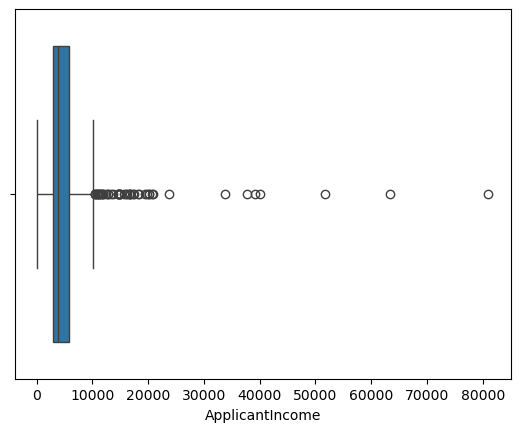

In [8]:
# null value not present in both "ApplicantIncome" and "CoapplicantIncome" so we can find outlier for both the column
sns.boxplot(x = "ApplicantIncome", data=dataset)
plt.show()

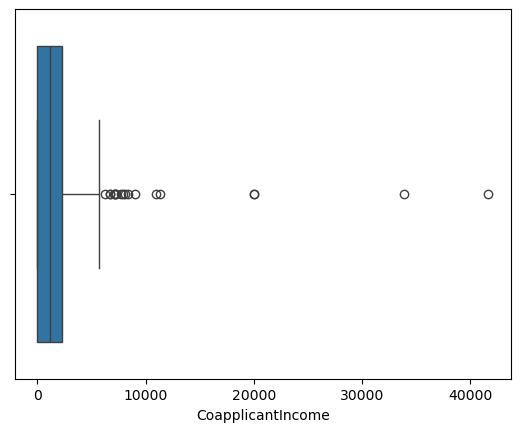

In [9]:
sns.boxplot(x = "CoapplicantIncome", data=dataset)
plt.show()

# Outlier removal using IQR

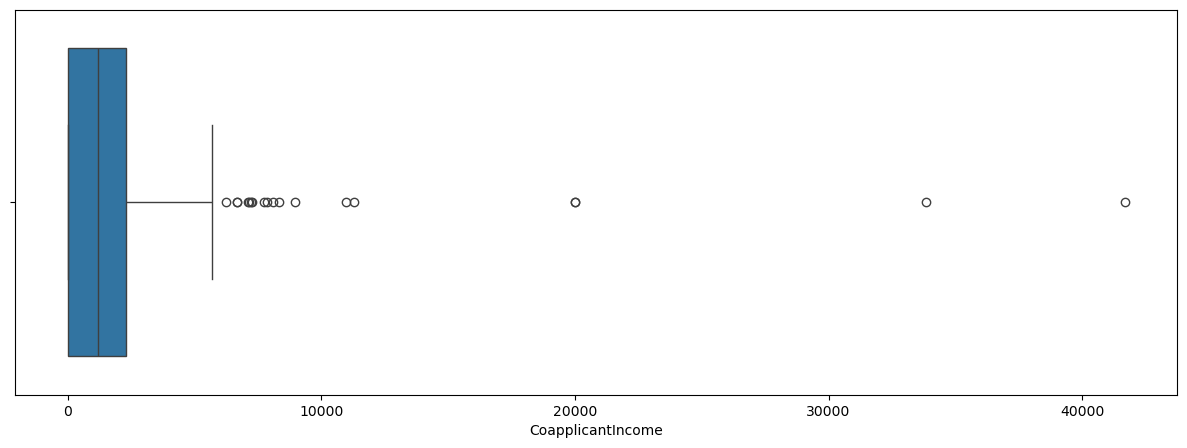

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome", data=dataset)
plt.show()

In [12]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
print(q1)
print(q3)

0.0
2297.25


In [13]:
# IQR = Inter Quantile Range
IQR = q3-q1
print(IQR)

2297.25


In [14]:
min_range = q1 - (IQR * 1.5)
max_range = q3 + (IQR * 1.5)
print(min_range)
print(max_range)

-3445.875
5743.125


In [16]:
#Now we create dataset who don't have any outlier(it mean maximum outlier remove from dataset)
new_dataset = dataset[dataset["CoapplicantIncome"]<=max_range]

In [17]:
new_dataset.shape

(596, 13)

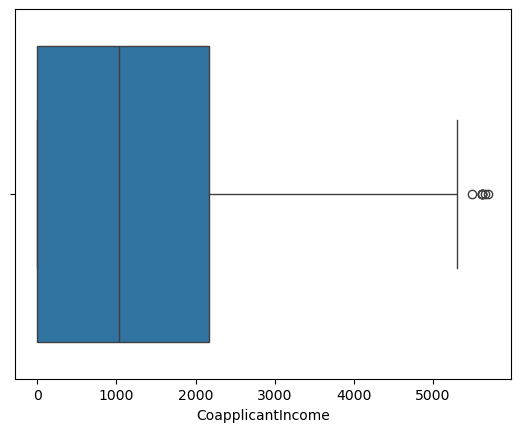

In [19]:
sns.boxplot(x = "CoapplicantIncome", data = new_dataset)
plt.show()

# Outlier removal using z score

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

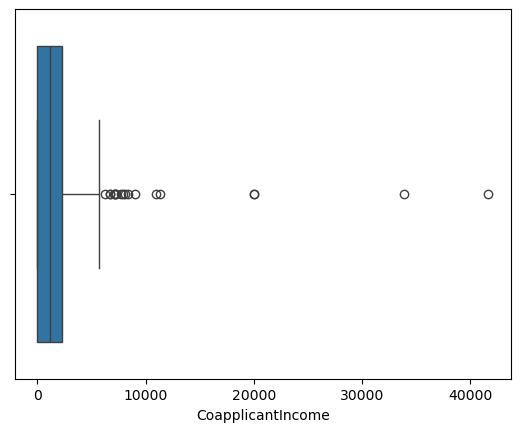

In [21]:
# we check outlier present in "CoapplicantIncome" column, but if there is any null value present in "CoapplicantIncome" column so first off all we have to remove that null values
# we check outlier present in dataset using Boxplot
sns.boxplot(x = "CoapplicantIncome", data = dataset)
plt.show()

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21676\2369516998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

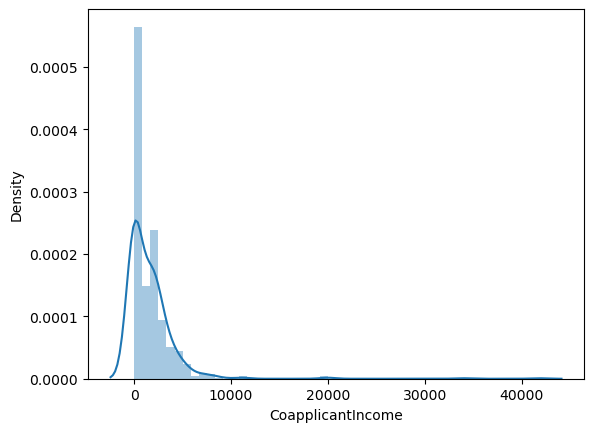

In [22]:
# we check outlier present in dataset using "Normal distribution curve"
sns.distplot(dataset["CoapplicantIncome"])

In [26]:
# How to "directly" remove outlier in normal distribution 
min_value = dataset["CoapplicantIncome"].mean() - (3*dataset["CoapplicantIncome"].std())
max_value = dataset["CoapplicantIncome"].mean() + (3*dataset["CoapplicantIncome"].std())

In [27]:
print(min_value)
print(max_value)

-7157.499309645475
10399.990905699677


In [29]:
new_data = dataset[dataset["CoapplicantIncome"]<=max_value]

C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21676\2037089602.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

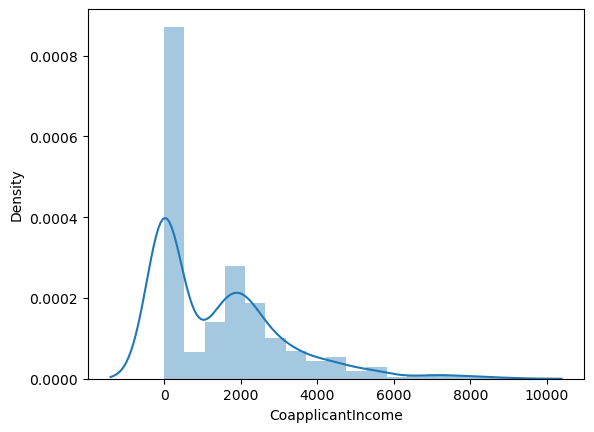

In [30]:
sns.distplot(new_data["CoapplicantIncome"])

In [31]:
# How to remove outlier using Z score
# Formula for Z score: Z(new)=(X-mean)/std
# Here X is value of any specific column, we also take mean and std for that specific column

Z_score = (dataset["CoapplicantIncome"]-dataset["CoapplicantIncome"].mean())/ (dataset["CoapplicantIncome"].std())
Z_score


0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [34]:
# We add one more column whose name is z_score who have all the values of Z_score of "CoapplicantIncome"
dataset["z_score"]=Z_score
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [35]:
new_data_using_z_score = dataset[dataset["z_score"]<3]
new_data_using_z_score

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


C:\Users\Vaishnav\AppData\Local\Temp\ipykernel_21676\592267151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data_using_z_score["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

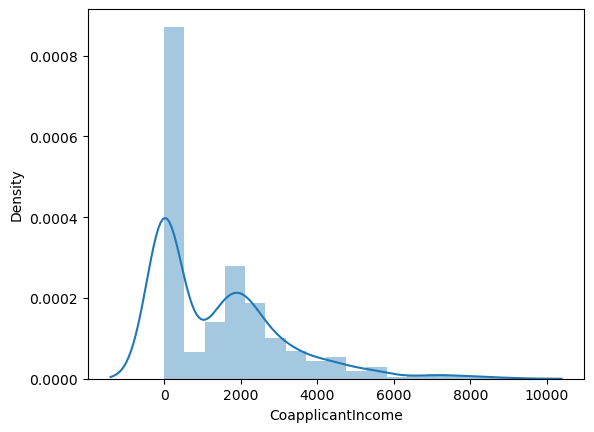

In [37]:
sns.distplot(new_data_using_z_score["CoapplicantIncome"])